# Statisitcal data analysis system

## First steps and guide
To use this system you can execute cells down below and it will calculate statistical data described in text cell above it. Some features may provide you with diagrams and tables

## Import of main dependencies
First block will connect main dependencies to the system and add file from specified path as a `DATA_DIR`. In the next cell you can add file name that should be located in the direcotry specified in `DATA_DIR`

In [1]:
import pandas as pd
import scipy as scp
import copy
from IPython.core.display import HTML
from Core.FeaturesModel import FeaturesModel
from functools import reduce
from IPython.display import clear_output
from ipywidgets import interact, interactive

import matplotlib.pyplot as plt
from ipywidgets import widgets
from IPython.display import display
from UI.ConverterUI import ConverterUI

# from scipy.stats import spearmanr
DATA_DIR = "data/"

## Raw data representation
Add file with support format into the system and view its raw represenrtion. All parsing parameters refer to the Python Pandas lib. If there is a need, you can easily drop unnecessary columns:
```pyton
data = data[data.columns.drop(list(data.filter(regex='Unnamed')))] # Drops unnamed columns
data = data.drop(['Column_1_Name', 'Column_2_Name'], 1) # Drops columns by their name
```

In [2]:
data = pd.read_csv(DATA_DIR + 'Mall_Customers.csv', ',')
data = data[data.columns.drop(list(data.filter(regex='Unnamed')))]
# data = data.drop(['Оценка', 'Группа'], 1)
data = data.dropna()
features_model = FeaturesModel(data, 'html')

features_model.raw_df

===-=-=-=-=-=  {1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 17, 18: 18, 19: 19, 20: 20, 21: 21, 22: 22, 23: 23, 24: 24, 25: 25, 26: 26, 27: 27, 28: 28, 29: 29, 30: 30, 31: 31, 32: 32, 33: 33, 34: 34, 35: 35, 36: 36, 37: 37, 38: 38, 39: 39, 40: 40, 41: 41, 42: 42, 43: 43, 44: 44, 45: 45, 46: 46, 47: 47, 48: 48, 49: 49, 50: 50, 51: 51, 52: 52, 53: 53, 54: 54, 55: 55, 56: 56, 57: 57, 58: 58, 59: 59, 60: 60, 61: 61, 62: 62, 63: 63, 64: 64, 65: 65, 66: 66, 67: 67, 68: 68, 69: 69, 70: 70, 71: 71, 72: 72, 73: 73, 74: 74, 75: 75, 76: 76, 77: 77, 78: 78, 79: 79, 80: 80, 81: 81, 82: 82, 83: 83, 84: 84, 85: 85, 86: 86, 87: 87, 88: 88, 89: 89, 90: 90, 91: 91, 92: 92, 93: 93, 94: 94, 95: 95, 96: 96, 97: 97, 98: 98, 99: 99, 100: 100, 101: 101, 102: 102, 103: 103, 104: 104, 105: 105, 106: 106, 107: 107, 108: 108, 109: 109, 110: 110, 111: 111, 112: 112, 113: 113, 114: 114, 115: 115, 116: 116, 117: 117, 118: 118, 119: 119, 120: 120, 

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
display(HTML(features_model.f_features_names()))

In [4]:
display(HTML(str(features_model.features[0])))

In [3]:
# display(HTML(str(list(map(lambda x: str(x), features_model.features)))))
features_list = list(map(lambda x: str(x), features_model.features))
features_html = reduce(lambda x, y: x+y, features_list)
display(HTML(features_html))

## Self descriptive statistics
Describes feature itself, by representing basic statistic metrics for scale. Scale is a 

In [7]:
from Core.FeaturesScales.DescriptiveStatisticsCalculators.NominalCalculator import NominalCalculator
from Core.FeaturesScales.DescriptiveStatisticsCalculators.OrdinalCalculator import OrdinalCalculator
from Core.FeaturesScales.DescriptiveStatisticsCalculators.IntervalCalculator import IntervalCalculator

def my_calc_mode(self, observation_dict):
    print("Helllo")
    return {k: v for (k, v) in observation_dict.items() if v == max(observation_dict.values())}

NominalCalculator.calc_mode = my_calc_mode


Dropdown(description='Choose feature: ', index=1, layout=Layout(width='100%'), options=('CustomerID', 'Gender'…

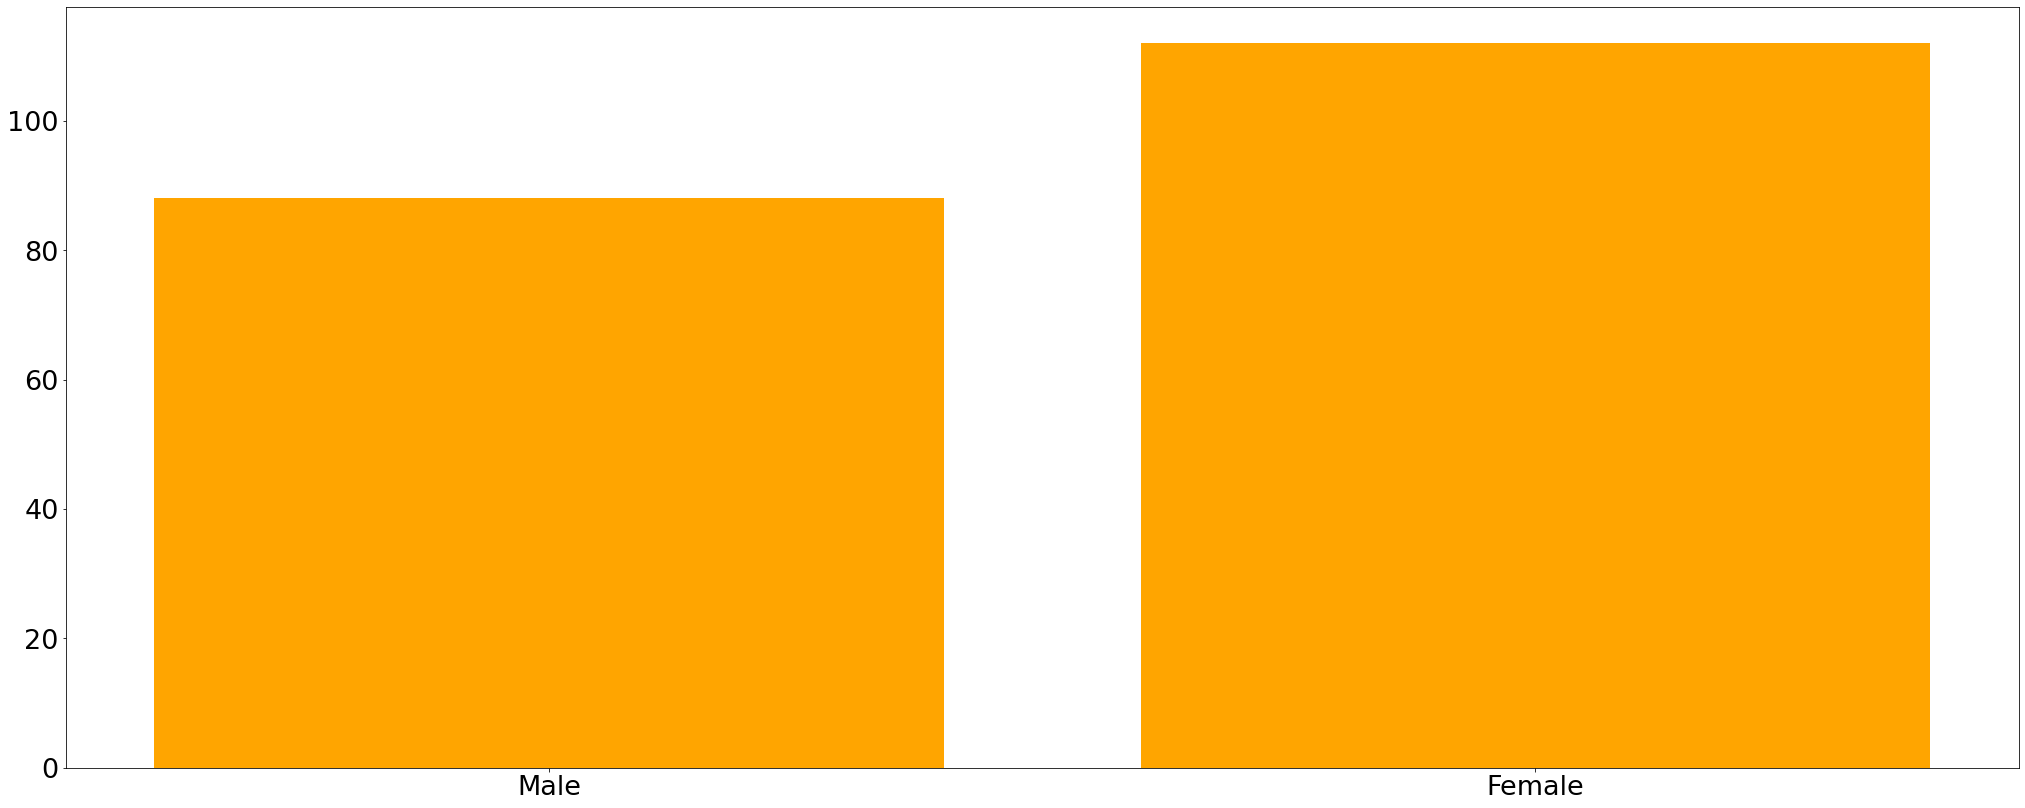

In [4]:
# print(features_model.features)
# display(HTML(features_model.features))
features_dropdown = widgets.Dropdown(
    options=features_model.raw_features_names(),
    value=features_model.raw_features_names()[0],
    description='Choose feature: ',
    disabled=False,
    style={'description_width': 'initial', 'width': '500px'},
    layout={'width':'100%'}
)
def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        clear_output(wait=True)
        display(features_dropdown)
        display(HTML(str(features_model[change['new']].f_get_stat_info())))

features_dropdown.observe(on_change)
display(features_dropdown)
display(HTML(features_model.features[0].f_get_stat_info()))

In [12]:
converter_ui = ConverterUI(features_model)
converter_ui.ui()

Dropdown(description='Choose feature: ', index=3, layout=Layout(width='100%'), options=('Date_reported', 'Coun…

"Recently changed: ['WHO_region', 'WHO_region']"

In [9]:
from UI.DependencyUI import DependencyUI
DependencyUI(features_model).ui()

Dropdown(description='Choose feature 1: ', layout=Layout(width='100%'), options=('Содержание дисциплины соотве…

In [14]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from copy import copy
from Core.Clustering.ClusteriseModule import ClusteriseModule

def my__init__(self, feature_1, feature_2):
        self.feature_1 = feature_1
        self.feature_2 = feature_2

def clusterise_features(self):
    feature_1_encoded_data = self.encode_features(self.feature_1)
    feature_2_encoded_data = self.encode_features(self.feature_2)
    pairs_data = list()
    for i in range(len(feature_1_encoded_data)):
        pairs_data.append([feature_1_encoded_data[i], feature_2_encoded_data[i]])
    print(pairs_data)
    kmeans = KMeans(init='k-means++', max_iter=300, n_init=10, random_state=0).fit(pairs_data)
    self.build_plot(kmeans)

def build_plot(self, kmeans):
    clusters_size = {}
    for cluster_label in kmeans.labels_:
        clusters_size[cluster_label] = clusters_size.get(cluster_label, 0) + 1
    for cluster_label in clusters_size:
        plt.scatter(kmeans.cluster_centers_[cluster_label][0],
                    kmeans.cluster_centers_[cluster_label][1],
                    s=clusters_size[cluster_label] * 125, c='orange', alpha=0.4, linewidth=4)
        plt.text(kmeans.cluster_centers_[cluster_label][0],
                 kmeans.cluster_centers_[cluster_label][1],
                 s=str(clusters_size[cluster_label]), horizontalalignment='center', verticalalignment='center')

    x_ticks_list = list(plt.xticks()[0])
    y_ticks_list = list(plt.yticks()[0])
    new_x_ticks = self.update_ticks_by_indexes(x_ticks_list,
                                               list(self.feature_1.aggregated_data.keys()))
    new_y_ticks = self.update_ticks_by_indexes(y_ticks_list,
                                               list(self.feature_2.aggregated_data.keys()))
    plt.xticks(x_ticks_list, new_x_ticks)
    plt.yticks(y_ticks_list, new_y_ticks)
    plt.xlabel(self.feature_1.name)
    plt.ylabel(self.feature_2.name)
    plt.figure(figsize=(35, 14))
    plt.show()

def encode_features(self, feature):
    encoding_list = list(feature.aggregated_data.keys())
    feature_encoded_data = list(map(lambda x: encoding_list.index(x), feature.data))
    return feature_encoded_data

def update_ticks_by_indexes(self, ticks_list, additional_values):
    """
    Will convert plot ticks tick_list [0.0, 0.25, 0.5, 0.75, 1.0]
    Using indexes and values in additional_values ['Some', 'Text']
    To ["0.0\nSome", 0.25, 0.5, 0.75, "1.0\nText"]
    """
    res_ticks = copy(ticks_list)
    for i in range(len(additional_values)):
        tick_replace_index = ticks_list.index(i)
        res_ticks[tick_replace_index] = f"{ticks_list[tick_replace_index]} or\n{additional_values[i]}"
    return res_ticks
ClusteriseModule.__init__ = my__init__

ClusteriseModule.clusterise_features = clusterise_features
ClusteriseModule.build_plot = build_plot
ClusteriseModule.encode_features = encode_features
ClusteriseModule.update_ticks_by_indexes = update_ticks_by_indexes


[[0, 0], [0, 1], [0, 1], [0, 1], [0, 2], [1, 0], [0, 0], [1, 2], [0, 1], [0, 0], [0, 1], [0, 0], [0, 0], [2, 0], [0, 0], [0, 0], [0, 1], [0, 1], [0, 1], [0, 0], [0, 0], [1, 2], [1, 0], [0, 1], [0, 0], [0, 2], [0, 0], [0, 2], [1, 1], [0, 1], [0, 0], [1, 1], [3, 1], [0, 0], [0, 1], [0, 1], [1, 0], [0, 1], [0, 0], [0, 2], [0, 2], [1, 1], [1, 1], [0, 2], [0, 2], [0, 1], [1, 0], [0, 1], [0, 0], [1, 0], [0, 0]]


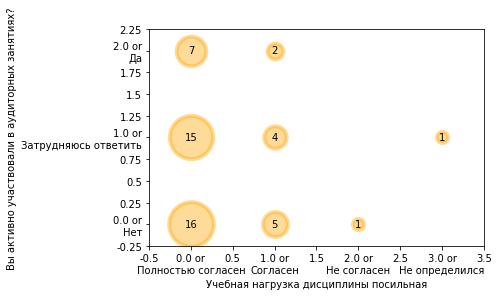

<Figure size 2520x1008 with 0 Axes>

Dropdown(description='Choose feature 1: ', layout=Layout(width='100%'), options=('Содержание дисциплины соотве…

In [18]:
from UI.ClusteriseUI import ClusteriseUI
ClusteriseUI(features_model).ui()

In [11]:
w = widgets.Dropdown(
    options=['Addition', 'Multiplication', 'Subtraction', 'Division'],
    value='Addition',
    description='Task:',
)
def on_change(change):
    print(f"type {change['type']} name: {change['name']}")
    if change['type'] == 'change' and change['name'] == 'value':
        print("changed to %s" % change['new'])

w.observe(on_change)

display(w)

Dropdown(description='Task:', options=('Addition', 'Multiplication', 'Subtraction', 'Division'), value='Additi…